In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

## Predict survival of passengers traveling in RMS titanic using Logistic Regression

In [2]:
df = pd.read_csv("http://raw.githubusercontent.com/ingledarshan/BoardInfinity/main/titanic.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
import missingno as msno

<AxesSubplot:>

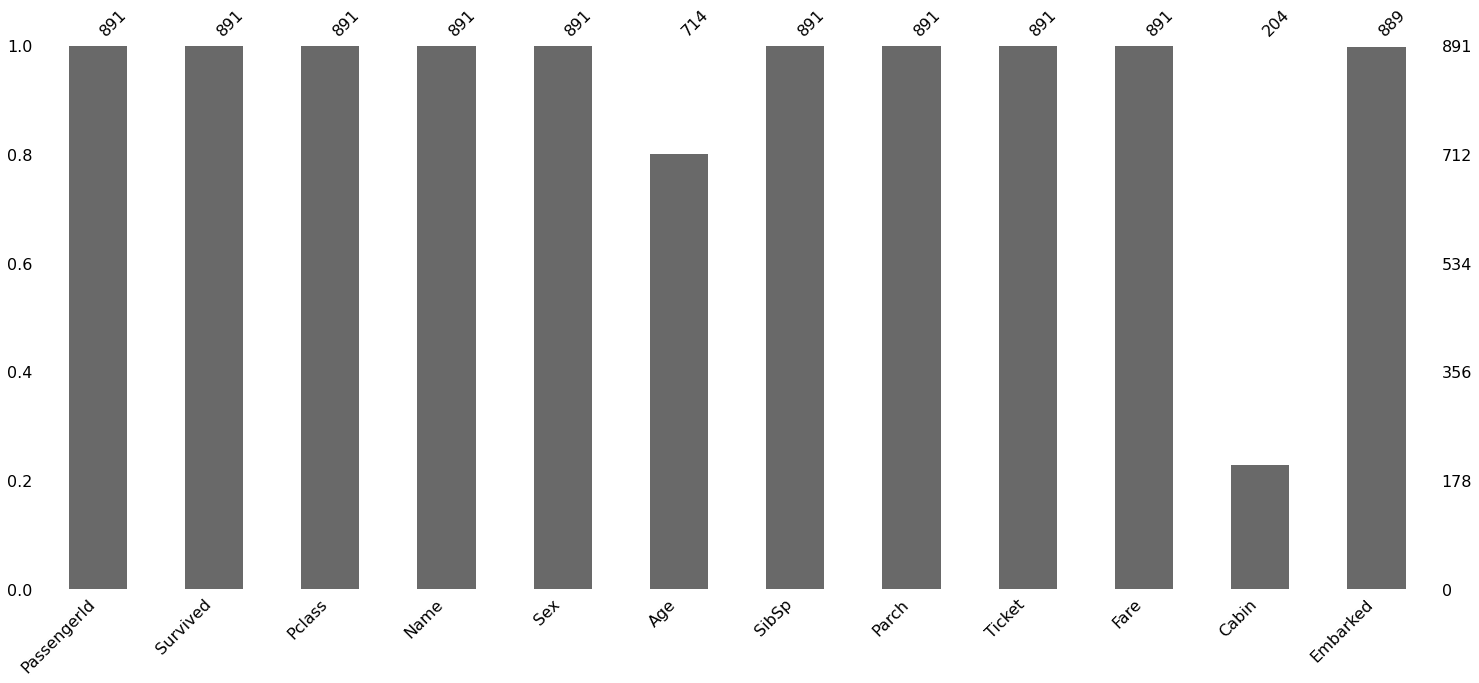

In [7]:
 msno.bar(df)

<AxesSubplot:>

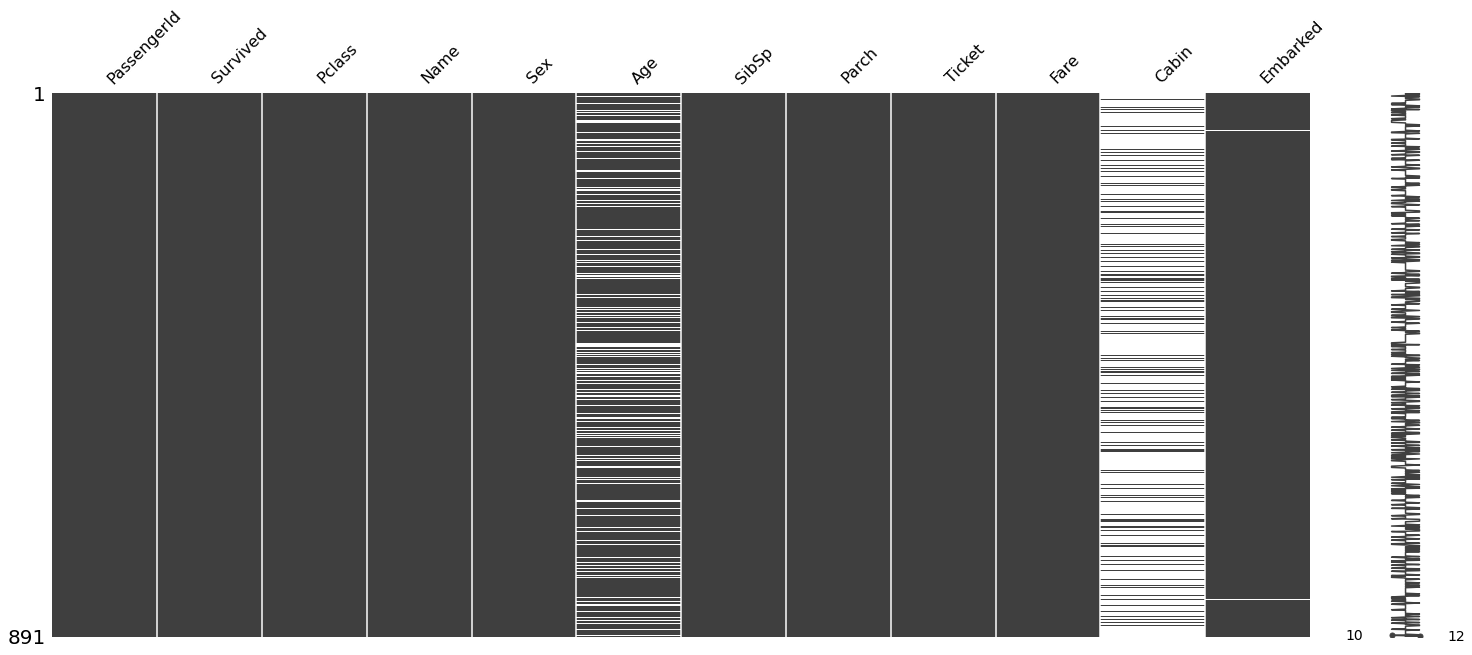

In [8]:
msno.matrix(df)

<AxesSubplot:>

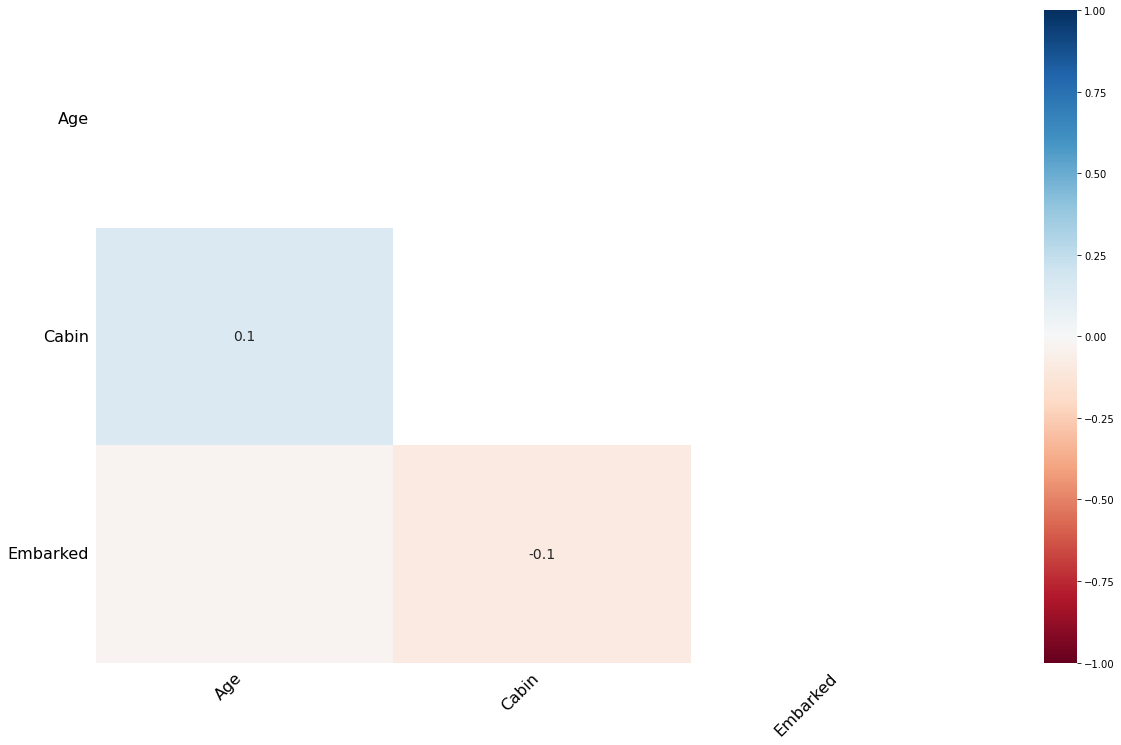

In [9]:
msno.heatmap(df)

<AxesSubplot:>

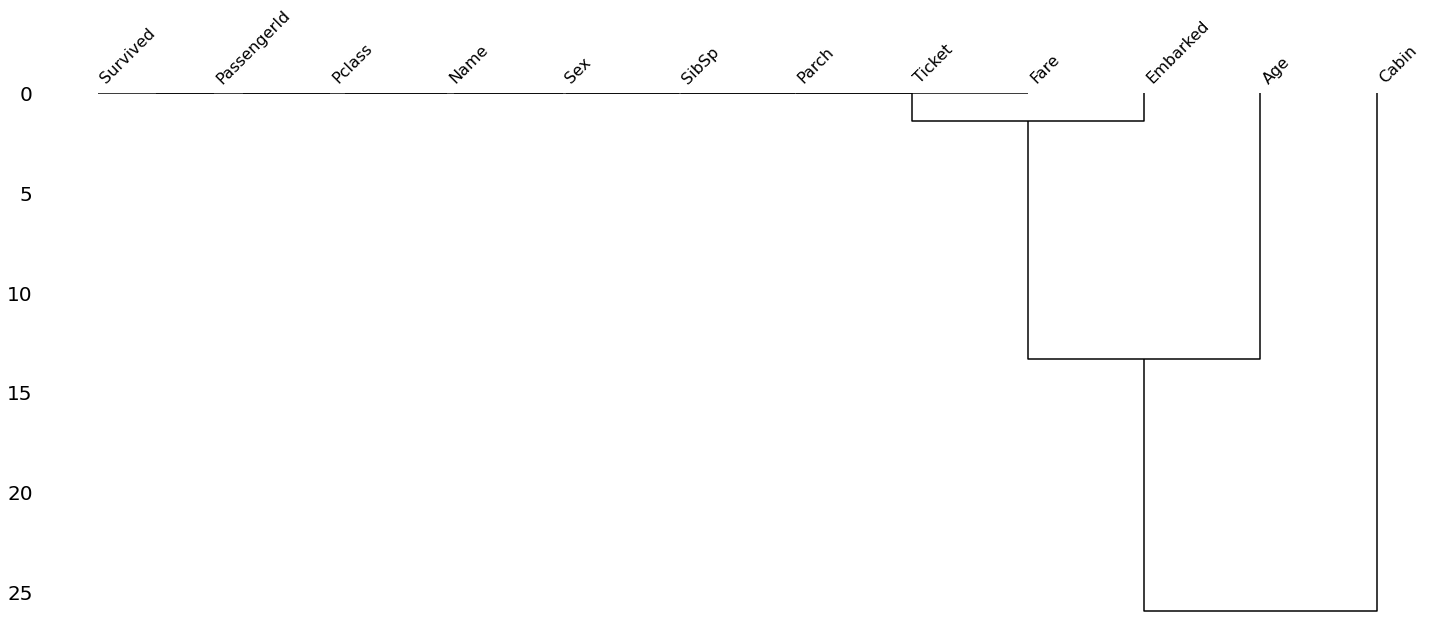

In [10]:
msno.dendrogram(df)

In [11]:
df.drop('Cabin',axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [12]:
# The value_counts() method returns a Series containing the counts of unique values. 
# By setting normalize=True, the object returned will contain the relative frequencies/percentage of the unique values.
df.Embarked.value_counts(normalize=True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

In [13]:
df['Embarked'].mode()[0]

'S'

In [14]:
df.Embarked.fillna(df['Embarked'].mode()[0], inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [15]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

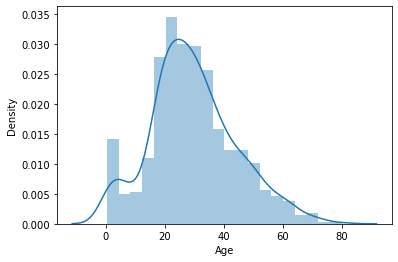

In [16]:
sns.distplot(df.Age);

In [17]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Feature Engineering

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
df['FamilySize'] = df.SibSp + df.Parch + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [20]:
pd.set_option('max_colwidth', -1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [21]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare'],axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1


In [22]:
# Segment the age col as per age.
# If Age is less than 15 then mark it as child else keep sex as it is.


df['GenderClass'] = df.apply(lambda x: 'child' if x['Age']<15 else x['Sex'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,GenderClass
0,0,3,male,22.0,1,0,S,2,male
1,1,1,female,38.0,1,0,C,2,female
2,1,3,female,26.0,0,0,S,1,female
3,1,1,female,35.0,1,0,S,2,female
4,0,3,male,35.0,0,0,S,1,male


In [23]:
df.GenderClass.value_counts()

male      538
female    275
child     78 
Name: GenderClass, dtype: int64

In [24]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,FamilySize
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.016639
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,0.065997
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,-0.248512
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.890712
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.783111
FamilySize,0.016639,0.065997,-0.248512,0.890712,0.783111,1.000000


SibSp and Parch have multicollinearity. Lets drop them

In [25]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [26]:
df.corr()

,Survived,Pclass,Age,FamilySize
Survived,1.000000,-0.338481,-0.069809,0.016639
Pclass,-0.338481,1.000000,-0.331339,0.065997
Age,-0.069809,-0.331339,1.000000,-0.248512
FamilySize,0.016639,0.065997,-0.248512,1.000000


In [27]:
df.drop(['Sex'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,Embarked,FamilySize,GenderClass
0,0,3,22.0,S,2,male
1,1,1,38.0,C,2,female
2,1,3,26.0,S,1,female
3,1,1,35.0,S,2,female
4,0,3,35.0,S,1,male


# Dummification/OneHotEncoding


pd.get_dummies()

In [28]:
df = pd.get_dummies(df, columns=['GenderClass', 'Embarked'], drop_first=True)

# https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [29]:
df.head()

,Survived,Pclass,Age,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,2,0,1,0,1
1,1,1,38.0,2,1,0,0,0
2,1,3,26.0,1,1,0,0,1
3,1,1,35.0,2,1,0,0,1
4,0,3,35.0,1,0,1,0,1


In [30]:
df.corr()

,Survived,Pclass,Age,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069809,0.016639,0.516808,-0.559161,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.331339,0.065997,-0.174101,0.095979,0.221009,0.074053
Age,-0.069809,-0.331339,1.000000,-0.248512,0.082790,0.250763,-0.013855,-0.019336
FamilySize,0.016639,0.065997,-0.248512,1.000000,0.104316,-0.346753,-0.058592,0.077359
GenderClass_female,0.516808,-0.174101,0.082790,0.104316,1.000000,-0.824859,0.105792,-0.121796
GenderClass_male,-0.559161,0.095979,0.250763,-0.346753,-0.824859,1.000000,-0.077532,0.102450
Embarked_Q,0.003650,0.221009,-0.013855,-0.058592,0.105792,-0.077532,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.019336,0.077359,-0.121796,0.102450,-0.499421,1.000000


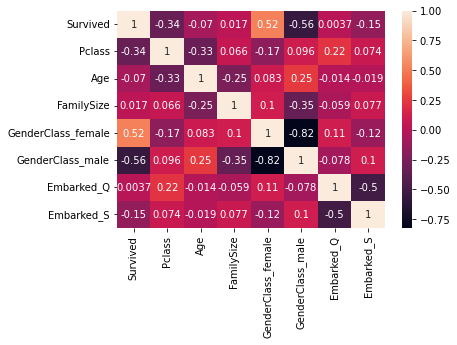

In [73]:
sns.heatmap(df.corr(), annot=True);

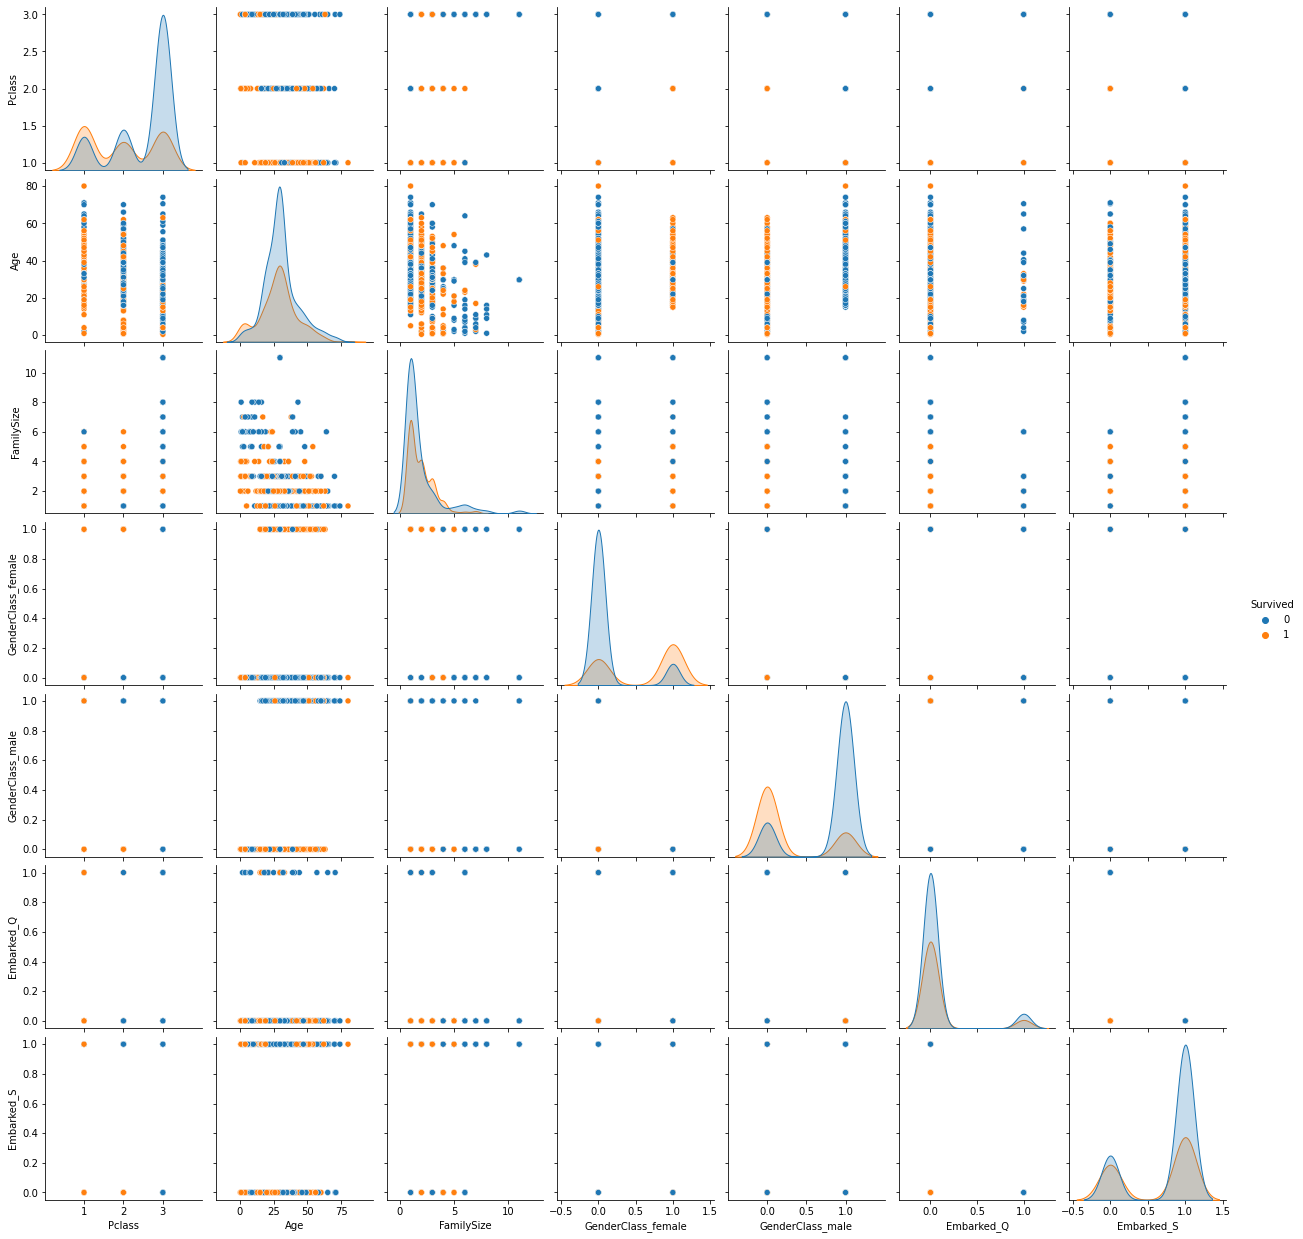

In [32]:
sns.pairplot(df, hue='Survived')

# Logistic Regression

In [33]:
df.head()

,Survived,Pclass,Age,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,2,0,1,0,1
1,1,1,38.0,2,1,0,0,0
2,1,3,26.0,1,1,0,0,1
3,1,1,35.0,2,1,0,0,1
4,0,3,35.0,1,0,1,0,1


In [34]:
X = df.iloc[:,df.columns!='Survived']
X.head()

,Pclass,Age,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,3,22.0,2,0,1,0,1
1,1,38.0,2,1,0,0,0
2,3,26.0,1,1,0,0,1
3,1,35.0,2,1,0,0,1
4,3,35.0,1,0,1,0,1


In [35]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [37]:
X_train.shape

(712, 7)

In [38]:
y_train.shape

(712,)

In [39]:
X_test.shape

(179, 7)

In [40]:
y_test.shape

(179,)

In [41]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

# Model Evaluation

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
accuracy_score(y_train, y_pred_train)

0.8328651685393258

In [45]:
accuracy_score(y_test, y_pred_test)

0.7988826815642458

In [46]:
confusion_matrix(y_test, y_pred_test)

array([[93, 13],
       [23, 50]], dtype=int64)

In [47]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
cm

,0,1
0,93,13
1,23,50


In [48]:
cm.columns = ['Predicted Died', 'Predicted Survived']
cm

,Predicted Died,Predicted Survived
0,93,13
1,23,50


In [49]:
cm.index = ['Actual Died', 'Actual Survived']
cm

,Predicted Died,Predicted Survived
Actual Died,93,13
Actual Survived,23,50


In [50]:
correctpred = 93 + 50
total = 93 + 50 + 13 + 23 

In [51]:
acc = correctpred/total
acc

0.7988826815642458

# Another Model with different parametes in the model

In [52]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logreg1 = LogisticRegression(C=15.4)
logreg1.fit(X_train, y_train)

LogisticRegression(C=15.4)

In [53]:
y_pred_train = logreg1.predict(X_train)
y_pred_test = logreg1.predict(X_test)

# Model Evaluation

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
accuracy_score(y_train, y_pred_train)

0.8356741573033708

In [56]:
accuracy_score(y_test, y_pred_test)

0.7932960893854749

In [57]:
confusion_matrix(y_test, y_pred_test)

array([[93, 13],
       [24, 49]], dtype=int64)

In [58]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
cm

,0,1
0,93,13
1,24,49


In [59]:
cm.columns = ['Predicted Died', 'Predicted Survived']
cm

,Predicted Died,Predicted Survived
0,93,13
1,24,49


In [60]:
cm.index = ['Actual Died', 'Actual Survived']
cm

,Predicted Died,Predicted Survived
Actual Died,93,13
Actual Survived,24,49


In [61]:
correctpred = 93 + 50
total = 93 + 50 + 13 + 23 

In [62]:
acc = correctpred/total
acc

0.7988826815642458

# Multiple Logistic Regression

One vs Rest Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [64]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [65]:
X = iris.data
y = iris.target

In [66]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [67]:
# Create one vs rest logistic regression 

clf = LogisticRegression(random_state=0, multi_class='ovr')

In [68]:
model = clf.fit(X_std, y)

In [69]:
# Lets create an unseen sample

new_observation = [[.5,.5,.5,.5]]

In [70]:
# Predict
model.predict(new_observation)
# Virginica

array([2])

In [71]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [72]:
model.predict_proba(new_observation)

array([[0.0387617 , 0.40669108, 0.55454723]])

# End of Logistic Regression